In [1]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#load/split data and preprocessing
df=pd.read_excel('../data/equipment_loss_rate.xlsx',sheet_name='warship_generate')

y=np.array(df.consume).reshape(-1,1)
acaler=StandardScaler()


train,test=train_test_split(y,train_size=100)

In [3]:
#fit model
model=pm.auto_arima(train,seasonal=True,m=12)#季节性ARIMA模型，月份12

In [4]:
#make my forecasts
forecasts=model.predict(test.shape[0],return_conf_int=True,alpha=.5) #predict N steps into the future

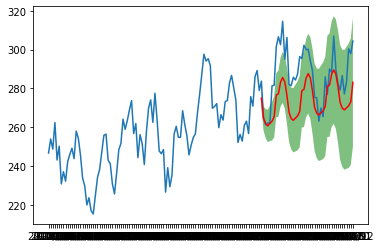

In [6]:
#visualize the forecast (blue=train, green=forecasts)
x=df.time
plt.plot(x,df.consume)
plt.plot(x[100:],forecasts[0],c='red')
plt.fill_between(x=x[100:],y1=forecasts[1][:,0],y2=forecasts[1][:,1],facecolor='green',alpha=0.5)

In [11]:
mse=sum(np.square(test-forecasts[0]))

In [12]:
mse

11660.124455957854